In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from heapq import heappush, heappop
import scipy.sparse as spsp
import matplotlib.pyplot as plt
import itertools

import importlib
import hubspoke as hs
_ = importlib.reload(hs)


In [2]:
# 各ケースのパラメータ設定
# prm = hs.Parameter(phi=50, rho=20, t=1.0, nu=10.0, d=1.0, N=17) # case (a)
# prm = hs.Parameter(phi=50, rho=10, t=1.0, nu=10.0, d=1.0, N=17) # case (b)
# prm = hs.Parameter(phi=10, rho=10, t=1.0, nu=10.0, d=1.0, N=17) # case (c)
# prm = hs.Parameter(phi=10.0, rho=5.0, t=1.0, nu=10.0, d=1.0, N=17) # case (d)
prm = hs.Parameter(phi=50.0, rho=2.5, t=1.0, nu=10.0, d=1.0, N=17) # case (e)
# prm = hs.Parameter(phi=25.0, rho=2.5, t=1.0, nu=10.0, d=1.0, N=17) # case (f)

net = hs.Network(prm)

# 上下限の初期解を設定
init_flow_lower = np.zeros(prm.L)
init_flow_upper = np.ones(prm.L)*(prm.nu*(prm.N-2))

# モデルの作成
model = hs.BB_model(prm, net)


In [3]:
%%time
# 大域的最適化
opt_Z, opt_SP_tree, opt_flow = model.solve(init_flow_lower, init_flow_upper)


opt_Z= 2617.711109168228
opt_Z= 2476.091717641625
opt_Z= 2308.7374804511064
opt_Z= 2257.9751057265667
opt_Z= 2212.744451118494
opt_Z= 2175.2755782786307
opt_Z= 2146.789668705488
opt_Z= 2109.0650484318057
opt_Z= 2088.639682449938
opt_Z= 2074.8112073613383
opt_Z= 2027.9615913383088
opt_Z= 1986.5984631485444
opt_Z= 1950.7670550752468
opt_Z= 1783.1292613084152
opt_Z= 1750.3823030458543
opt_Z= 1680.729499356667
opt_Z= 1673.413372716751
opt_Z= 1593.7354341411774
opt_Z= 1593.3435471582568
opt_Z= 1591.569721654976
opt_Z= 1536.6867596759816
opt_Z= 1513.673634402005
opt_Z= 1492.1530802438465
opt_Z= 1465.963541818669
opt_Z= 1377.0930400747495
opt_Z= 1265.208800070839
opt_Z= 1168.8890541378066
opt_Z= 1041.4403200630184
opt_Z= 929.556080059108
opt_Z= 817.6718400551977
opt_Z= 813.214765098425
k= 14386
CPU times: total: 1min 4s
Wall time: 1min 9s


sp_tree =  [-1, 0, 1, 2, 3, 4, 7, 8, 9, 10, 0, 10, 11, 12, 13, 14, 15]
objective value =  813.214765098425


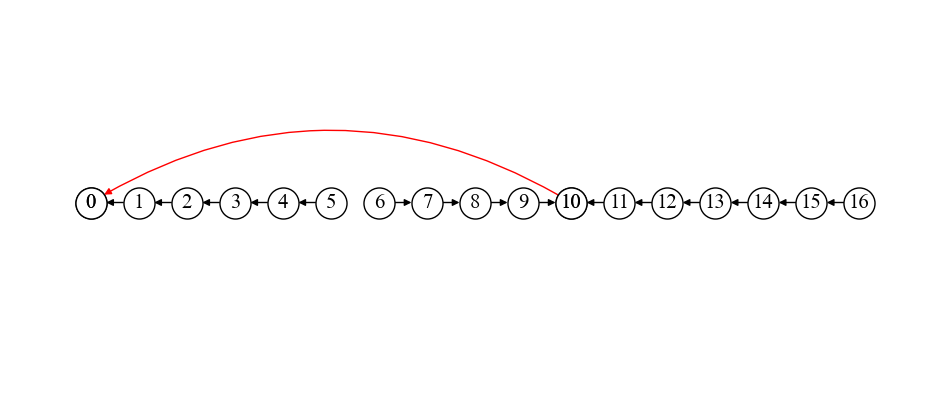

In [4]:
# ネットワーク構造の可視化
hs.link_plot(prm, net, opt_SP_tree)
print('sp_tree = ', opt_SP_tree)
print('objective value = ', opt_Z)